In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from IPython.display import display
import mglearn

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("cross validation score:", scores)
print("mean of cv score:", scores.mean())

cross validation score: [0.96666667 1.         0.93333333 0.96666667 1.        ]
mean of cv score: 0.9733333333333334


C:\Users\consi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)

display(res)

C:\Users\consi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'fit_time': array([0.05797315, 0.04737329, 0.03129458, 0.04686284, 0.05401587]),
 'score_time': array([0.00100327, 0.        , 0.        , 0.        , 0.00096393]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [5]:
df = pd.DataFrame(res)

display(df)

,fit_time,score_time,test_score,train_score
0,0.057973,0.001003,0.966667,0.966667
1,0.047373,0.000000,1.000000,0.966667
2,0.031295,0.000000,0.933333,0.983333
3,0.046863,0.000000,0.966667,0.983333
4,0.054016,0.000964,1.000000,0.975000


In [6]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
print("param grid:\n", param_grid)

param grid:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [9]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [11]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [12]:
print("test score:", grid_search.score(X_test, y_test))

test score: 0.9736842105263158


In [13]:
print("best params:\n", grid_search.best_params_)
print("best validation score:", grid_search.best_score_)

best params:
 {'C': 10, 'gamma': 0.1}
best validation score: 0.9731225296442687


In [14]:
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.00425158,0.00119939,0.000599194,0,0
std_fit_time,0.00552122,0.000400119,0.00048924,0,0
mean_score_time,0.000952959,0.000609684,0.000598907,0,0.00312223
std_score_time,0.000560389,0.000498155,0.000489012,0,0.00624447
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


In [15]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)


from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

pred_logreg = logreg.predict(X_test)

confusion = confusion_matrix(y_test, pred_logreg)
print("confusion matrix:\n", confusion)

confusion matrix:
 [[399   4]
 [  7  40]]


C:\Users\consi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn.metrics import f1_score

print("f1 score:", f1_score(y_test, pred_logreg))

f1 score: 0.8791208791208791


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_logreg, target_names=["Not 9", "9"]))

              precision    recall  f1-score   support

       Not 9       0.98      0.99      0.99       403
           9       0.91      0.85      0.88        47

    accuracy                           0.98       450
   macro avg       0.95      0.92      0.93       450
weighted avg       0.98      0.98      0.98       450



In [18]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, logreg.decision_function(X_test))

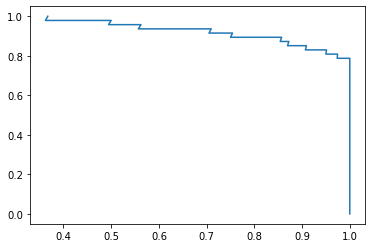

In [19]:
plt.plot(precision, recall)

In [20]:
from sklearn.metrics import average_precision_score

print("average precision:", average_precision_score(y_test, logreg.decision_function(X_test)))

average precision: 0.945912841757168


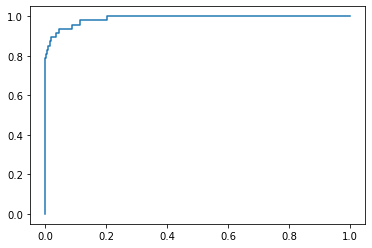

In [22]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logreg.decision_function(X_test))

plt.plot(fpr, tpr)